# Formula One: Predicting The World Champions Of Tomorrow
### Anthony Chen, Ayush Saldhi and Taylor Oglow


# Introduction

Formula 1 represents the highest class of professional open-wheeled single-seater motorsport, popularly known as formula racing. With unparalleled intensity and competitiveness, a Formula 1 World Championship consists of a series of globe-trotting races held on circuits. Ten teams, each consisting of two starting drivers, responsible for developing and maintaining their cars compete to cross the finish line first after completing several predetermined laps.  Points are awarded to the first ten finishers in each race and are accumulated throughout the season. Ultimately, the driver and the team that have accumulated the most points are crowned with the Drivers’ and Constructors’ World Championship.

Over the past decade, only two teams and four drivers have been successful in their pursuit of the world championship. In a sport that thrives on data, this raises concerns regarding the ability to predict the results of a championship. Knowing this, our team sets out to try and answer the following question:


**Question**: 
<br> 
*What will the standing for each driver and constructor be in the upcoming 2022 Formula 1 World Championship?*

In our journey of predicting the results for the upcoming world championship, we will be utilizing the dataset “Formula 1 World Championship (1950-2021)” which consists of 14 files each focusing on a different aspect of the sport such as races, constructors, circuits, etc. until 2022. 

This dataset was created by the Kaggle user Vopani via http://ergast.com/mrd/ and is found at https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020. 

1. circuits.csv
2. constructor_results.csv
3. constructor_standings.csv
4. constructors.csv
5. driver_standings.csv
6. drivers.csv
7. lap_times.csv
8. pit_stops.csv
9. qualifying.csv
10. races.csv
11. results.csv
12. seasons.csv
13. sprint_results.csv
14. status.csv


This dataset was created by the Kaggle user Vopani via http://ergast.com/mrd/ and is found at https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020. 

# Methods & Results

### Demonstration that the data can be read into R

In [222]:
library (tidyverse)
library(cowplot)
library(RColorBrewer)
source("Lap Wrangling/source/points.r")

In [2]:
# Reading entire data set from Git Hub

constructor_standings <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/constructor_standings.csv") 

constructor_results <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/constructor_results.csv") 
    
driver_standings <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/driver_standings.csv")

pit_stops <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/pit_stops.csv")
           
qualifying <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/qualifying.csv") 

results <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/results.csv") 

races <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/races.csv") 

status <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/status.csv") 


### Files used

circuits <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/circuits.csv")

constructors <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/constructors.csv")

drivers <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/drivers.csv")

races <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/races.csv") 

lap_times <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/lap_times.csv") 

constructor_standings <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/constructor_standings.csv")

driver_standings <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/driver_standings.csv")

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  driverStandingsId = col_double(),
  raceId = col_double(),
  driverId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_double(),
  wins = col_double()
)

Warning message:
“21 parsing failures.
  row          col expected actual                                                                                                      file
 4376 positionText a double      D 'https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/driver_standings.csv'
333

### Cleaning and wrangling data

Before commencing the process of predicting the standings of all 20 drivers and their respective teams in the upcoming 2022 Formula 1 World Championship, it is crucial to wrangle the data for the scope of this project.

This process first begins by filtering for the Grand Prix's that are scheduled to take place in the upcoming season:

After cross-referencing the 2022 Formula 1 Race Calendar with the 'circuits' 

In [3]:
# Filtering 2022 GP circuits 

# Vector of 2022 GP locations

locations_2022 <- c("Sakhir", "Jeddah", "Melbourne", "Imola", "Miami", "Montmeló", "Monte-Carlo", "Baku", "Montreal", "Silverstone", "Spielberg", 
                    "Le Castellet", "Budapest", "Spa", "Zandvoort", "Monza", "Sochi", "Marina Bay", "Suzuka", "Austin", "Mexico City", "São Paulo", "Abu Dhabi")

In [4]:


# Filtering circuit data set by locations vector 

circuits_2022 <- circuits %>% 
           filter(location %in% locations_2022) %>%
           filter(name != "A1-Ring") %>%
           select(circuitId:alt)

# circuits_2022


# Extracting 2022 circuit ID's 


circuit_ids <- circuits_2022 %>%
              pull(circuitId)

# circuit_ids


# Extracting 2022 circuit name and ID's


circuits_IDS <- circuits_2022 %>%
                select(circuitId, name, country, location) %>% 
                arrange(country)

# circuits_IDS


In [5]:
# Filtering 2022 Constructors

team_names <- c("Alfa Romeo", "AlphaTauri", "Alpine F1 Team", "Aston Martin", "Ferrari", 
                "Haas F1 Team", "McLaren", "Mercedes", "Red Bull", "Williams")

teams_2022 <- constructors %>%
                 filter(name %in% team_names)

# teams_2022


# Extracting 2022 Constructor ID's

constructor_ids <- teams_2022 %>%
              pull(constructorId)

# constructor_ids

In [6]:
# Filtering 2022 Drivers

driver_surnames <- c("Hamilton", "Russell", "Albon", "Zhou", "Bottas", "Gasly", "Tsunoda", "Alonso", "Ocon", "Vettel", "Stroll", 
                     "Leclerc", "Sainz", "Mazepin", "Schumacher", "Ricciardo", "Norris", "Verstappen", "Pérez", "Latifi")
 
drivers_2022 <- drivers %>%
                filter(surname %in% driver_surnames) %>%
                filter(!(forename %in% c("Ralf", "Michael", "Jos", "Duncan")))

# drivers_2022 


# Extracting Driver IDS

driver_ids <- drivers_2022 %>%
              pull(driverId)

# driver_ids

# Extracting Driver Codes

driver_codes <- drivers_2022 %>%
              pull(code)

# driver_codes

# Combining IDS and Codes

driver_id_code <- data.frame(driver_ids, driver_codes)

# driver_id_code

In [7]:
#### Filtering Race Data for 2022 Races

past_2022_races <- races %>%
                    filter(circuitId %in% circuit_ids) %>%
                    filter(year != "2022")

# past_2022_races


##### Extracting Race ID's

race_ids <- past_2022_races %>%
            pull(raceId)

# race_ids

##### Filtering Race Data For All 23 Circuits

bahrain <- past_2022_races %>% 
            filter(circuitId == 3) %>%
            arrange(desc(year))

sa <- past_2022_races %>% 
            filter(circuitId == 77) %>%
            arrange(desc(year))

aus <- past_2022_races %>% 
            filter(circuitId == 1) %>%
            arrange(desc(year))

imola <- past_2022_races %>% 
            filter(circuitId == 21) %>%
            arrange(desc(year))

miami <- past_2022_races %>% 
            filter(circuitId == 79) %>%
            arrange(desc(year))

spain <- past_2022_races %>% 
            filter(circuitId == 4) %>%
            arrange(desc(year))

monaco <- past_2022_races %>% 
            filter(circuitId == 6) %>%
            arrange(desc(year))

azerbijan <- past_2022_races %>% 
            filter(circuitId == 73) %>%
            arrange(desc(year))

canada <- past_2022_races %>% 
            filter(circuitId == 7) %>%
            arrange(desc(year))

uk <- past_2022_races %>% 
            filter(circuitId == 9) %>%
            arrange(desc(year))

austria <- past_2022_races %>% 
            filter(circuitId == 70) %>%
            arrange(desc(year))

france <- past_2022_races %>% 
            filter(circuitId == 34) %>%
            arrange(desc(year))

hungary <- past_2022_races %>% 
            filter(circuitId == 11) %>%
            arrange(desc(year))

belgium <- past_2022_races %>% 
            filter(circuitId == 13) %>%
            arrange(desc(year))

netherlands <- past_2022_races %>% 
            filter(circuitId == 39) %>%
            arrange(desc(year))

monza <- past_2022_races %>% 
            filter(circuitId == 14) %>%
            arrange(desc(year))

russia <-  past_2022_races %>% 
            filter(circuitId == 71) %>%
            arrange(desc(year))

singapore <- past_2022_races %>% 
            filter(circuitId == 15) %>%
            arrange(desc(year))

japan <- past_2022_races %>% 
            filter(circuitId == 22) %>%
            arrange(desc(year))

austin <- past_2022_races %>% 
            filter(circuitId == 69) %>%
            arrange(desc(year))

mexico <- past_2022_races %>% 
            filter(circuitId == 32) %>%
            arrange(desc(year))

brazil <- past_2022_races %>% 
            filter(circuitId == 18) %>%
            arrange(desc(year))

uae <- past_2022_races %>% 
            filter(circuitId == 24) %>%
            arrange(desc(year))

In [8]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Drivers

ham_laps <- lap_data %>%
            filter(driverId == 1)

alo_laps <- lap_data %>%
            filter(driverId == 4)

vet_laps <- lap_data %>%
            filter(driverId == 20)

gas_laps <- lap_data %>%
            filter(driverId == 842)

per_laps <- lap_data %>%
            filter(driverId == 815)

ric_laps <- lap_data %>%
            filter(driverId == 817)

bot_laps <- lap_data %>%
            filter(driverId == 822)

ver_laps <- lap_data %>%
            filter(driverId == 830)

sai_laps <- lap_data %>%
            filter(driverId == 832)

oco_laps <- lap_data %>%
            filter(driverId == 839)

str_laps <- lap_data %>%
            filter(driverId == 840)

lec_laps <- lap_data %>%
            filter(driverId == 844)

nor_laps <- lap_data %>%
            filter(driverId == 846)

rus_laps <- lap_data %>%
            filter(driverId == 847)

alb_laps <- lap_data %>%
            filter(driverId == 848)

lat_laps <- lap_data %>%
            filter(driverId == 849)

tsu_laps <- lap_data %>%
            filter(driverId == 852)

# maz_laps <- lap_data %>%
#             filter(driverId == 853)

# upon review of teamates, Mazepin can be deleted. 

msc_laps <- lap_data %>%
            filter(driverId == 854)

zho_laps <- lap_data %>%
            filter(driverId == 855)

mag_laps <- lap_data %>%
            filter(driverId == 825)
#new driver, Kevin Magnussen

### Visualizing the data in an initial plot

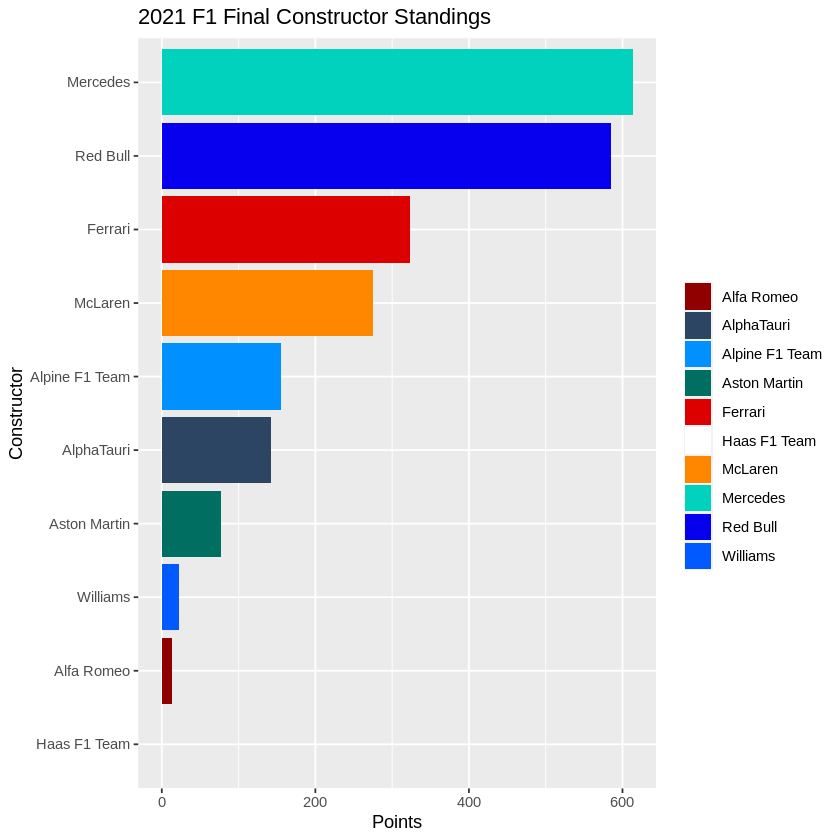

In [9]:
#Visualizing the 2021 constructor data into a bar chart, using constructors.csv and constructor standings.csv

constructor_filtered <- constructor_standings %>%
    select (raceId, constructorId, points) %>%
    filter (raceId == 1073) %>%
    arrange (desc (points))

constructor_filtered$constructorId <- as.factor(constructor_filtered$constructorId)
constructor_filtered$raceId <- as.factor(constructor_filtered$raceId)
#change raceId and Constructor Id coltype to <fct> 

#The below columns were changed to have the Racing Team name instead of RaceId. Please edit this if you find a cleaner way to code this
constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 6] <- "Ferrari"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 131] <- "Mercedes"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 9] <- "Red Bull"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 1] <- "McLaren"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 213] <- "AlphaTauri"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 117] <- "Aston Martin"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 51] <- "Alfa Romeo"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 214] <- "Alpine F1 Team"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 3] <- "Williams"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

constructor_filtered$constructorId <- as.character(constructor_filtered$constructorId)
constructor_filtered[constructor_filtered == 210] <- "Haas F1 Team"
constructor_filtered$constructorId <- as.factor (constructor_filtered$constructorId)

#RACE ID's 1052-1073 = 2021 season. Final points are already displayed under RACEID 1073 since cumulative points are tracked under "points"

constructor_bar <- constructor_filtered %>% 
    ggplot(aes(reorder(constructorId, +points), points, fill = constructorId)) +
    geom_bar (stat = "identity")+
    scale_fill_manual(values = c("#900000",
                                 "#2B4562",
                                 "#0090FF",
                                 "#006F62",
                                 "#DC0000",
                                 "#FFFFFF",
                                 "#FF8700",
                                 "#00D2BE",
                                 "#0600EF",
                                 "#005AFF"))+ 
    labs (title = "2021 F1 Final Constructor Standings", 
         x = "Constructor",
         y = "Points",
         fill = "") 
    #color swatches correspond to the official colors used on television https://www.reddit.com/r/formula1/comments/lfpyfp/f1_2021_team_colors_hex_codes/
    # theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))
    # Use this code if want to remove coord_flip and change (+ aes points to -)

constructor_flipped<- constructor_bar+coord_flip ()
constructor_flipped
# constructor_flipped + annotate ("text", x = 10, y = 567, label = "613.5")
# option of annotating if makes more readable



# Primary Data Analysis

## Linear Regression

## Race Result Wrangling

In [10]:
### Final Race Time Data

aa_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/aa_race.csv")

cl_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/cl_race.csv")

cs_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/cs_race.csv")

dr_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/dr_race.csv")

eo_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/eo_race.csv")

fa_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/fa_race.csv")

gr_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/gr_race.csv")

km_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/km_race.csv")

lh_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/lh_race.csv")

ln_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/ln_race.csv")

ls_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/ls_race.csv")

ms_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/ms_race.csv")

mv_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/mv_race.csv")

nl_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/nl_race.csv")

pg_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/pg_race.csv")

sp_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/sp_race.csv")

sv_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/sv_race.csv")

vb_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/vb_race.csv")

yt_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/yt_race.csv")

zg_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/zg_race.csv")

Parsed with column specification:
cols(
  Round = col_double(),
  .metric = col_character(),
  .estimator = col_character(),
  .estimate = col_double(),
  race_time_milliseconds = col_double(),
  race_time_mins = col_double(),
  race_time_hrs = col_double()
)

Parsed with column specification:
cols(
  Round = col_double(),
  .metric = col_character(),
  .estimator = col_character(),
  .estimate = col_double(),
  race_time_milliseconds = col_double(),
  race_time_mins = col_double(),
  race_time_hrs = col_double()
)

Parsed with column specification:
cols(
  Round = col_double(),
  .metric = col_character(),
  .estimator = col_character(),
  .estimate = col_double(),
  race_time_milliseconds = col_double(),
  race_time_mins = col_double(),
  race_time_hrs = col_double()
)

Parsed with column specification:
cols(
  Round = col_double(),
  .metric = col_character(),
  .estimator = col_character(),
  .estimate = col_double(),
  race_time_milliseconds = col_double(),
  race_time_mins = col_

In [11]:
aa_race <- aa_race %>%
            mutate(Driver = "Alexander Albon") %>%
            mutate(Team = "Williams")

cl_race <- cl_race %>%
            mutate(Driver = "Charles Leclerc") %>%
            mutate(Team = "Ferrari")

cs_race <- cs_race %>%
            mutate(Driver = "Carlos Sainz Jr.") %>%
            mutate(Team = "Ferrari")

dr_race <- dr_race %>%
            mutate(Driver = "Daniel Ricciardo") %>% 
            mutate(Team = "McLaren")

eo_race <- eo_race %>%
           mutate(Driver = "Esteban Ocon") %>% 
           mutate(Team = "Alpine")

fa_race <- fa_race %>%
           mutate(Driver = "Fernando Alonso") %>% 
           mutate(Team = "Alpine")

gr_race <- gr_race %>%
           mutate(Driver = "George Russell") %>%
           mutate(Team = "Mercedes")

km_race <- km_race %>%
           mutate(Driver = "Kevin Magnussen") %>%
           mutate(Team = "Haas F1 Team")

lh_race <- lh_race %>%
           mutate(Driver = "Lewis Hamilton")  %>%
           mutate(Team = "Mercedes")

ln_race <- ln_race %>%
           mutate(Driver = "Lando Norris") %>% 
           mutate(Team = "McLaren")

ls_race <- ls_race %>%
           mutate(Driver = "Lance Stroll") %>%
           mutate(Team = "Aston Martin")

ms_race <- ms_race %>%
           mutate(Driver = "Mick Schumacher") %>%
           mutate(Team = "Haas F1 Team")

mv_race <- mv_race %>%
           mutate(Driver = "Max Verstappen") %>%
           mutate(Team = "Red Bull Racing")

nl_race <- nl_race %>%
           mutate(Driver = "Nicholas Latfifi") %>%
           mutate(Team = "Williams")

pg_race <- pg_race %>%
           mutate(Driver = "Pierre Gasly")  %>%
           mutate(Team = "AlphaTauri")

sp_race <- sp_race %>%
           mutate(Driver = "Sergio Pérez") %>%
           mutate(Team = "Red Bull Racing")

sv_race <- sv_race %>%
           mutate(Driver = "Sebastian Vettel")  %>%
           mutate(Team = "Aston Martin")

vb_race <- vb_race %>%
           mutate(Driver = "Valtteri Bottas") %>%
           mutate(Team = "Alfa Romeo")

yt_race <- yt_race %>%
           mutate(Driver = "Yuki Tsunoda") %>%
           mutate(Team = "AlphaTauri")

zg_race <- zg_race %>%
           mutate(Driver = "Zhou Guanyu") %>%
           mutate(Team = "Alfa Romeo")

In [12]:
season_combined <- rbind(aa_race, cl_race, cs_race, dr_race, eo_race, fa_race, gr_race, km_race, lh_race, ln_race, ls_race, ms_race, mv_race,
                          nl_race, pg_race, sp_race, sv_race, vb_race, yt_race, zg_race) %>% 
                            group_by(Round) %>% 
                            arrange(by = race_time_milliseconds) %>%
                            mutate(Finish = row_number()) %>%
                            arrange(by = Finish)

points <- c(25, 18, 15, 12, 10, 8, 6, 4, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


season_points <- season_combined %>% 
                    group_by(Round) %>%
                    mutate(Points = (Finish * 0) + points)

# tes1111 <- season_points %>% group_by(Driver) %>% summarize(T = sum(Points)) %>% arrange(T)

write_csv(season_points, "season_model")

## Constructors' World Championship

## Drivers' World Championship

Rows: 440 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Driver
dbl (2): Points_UTR, Round


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



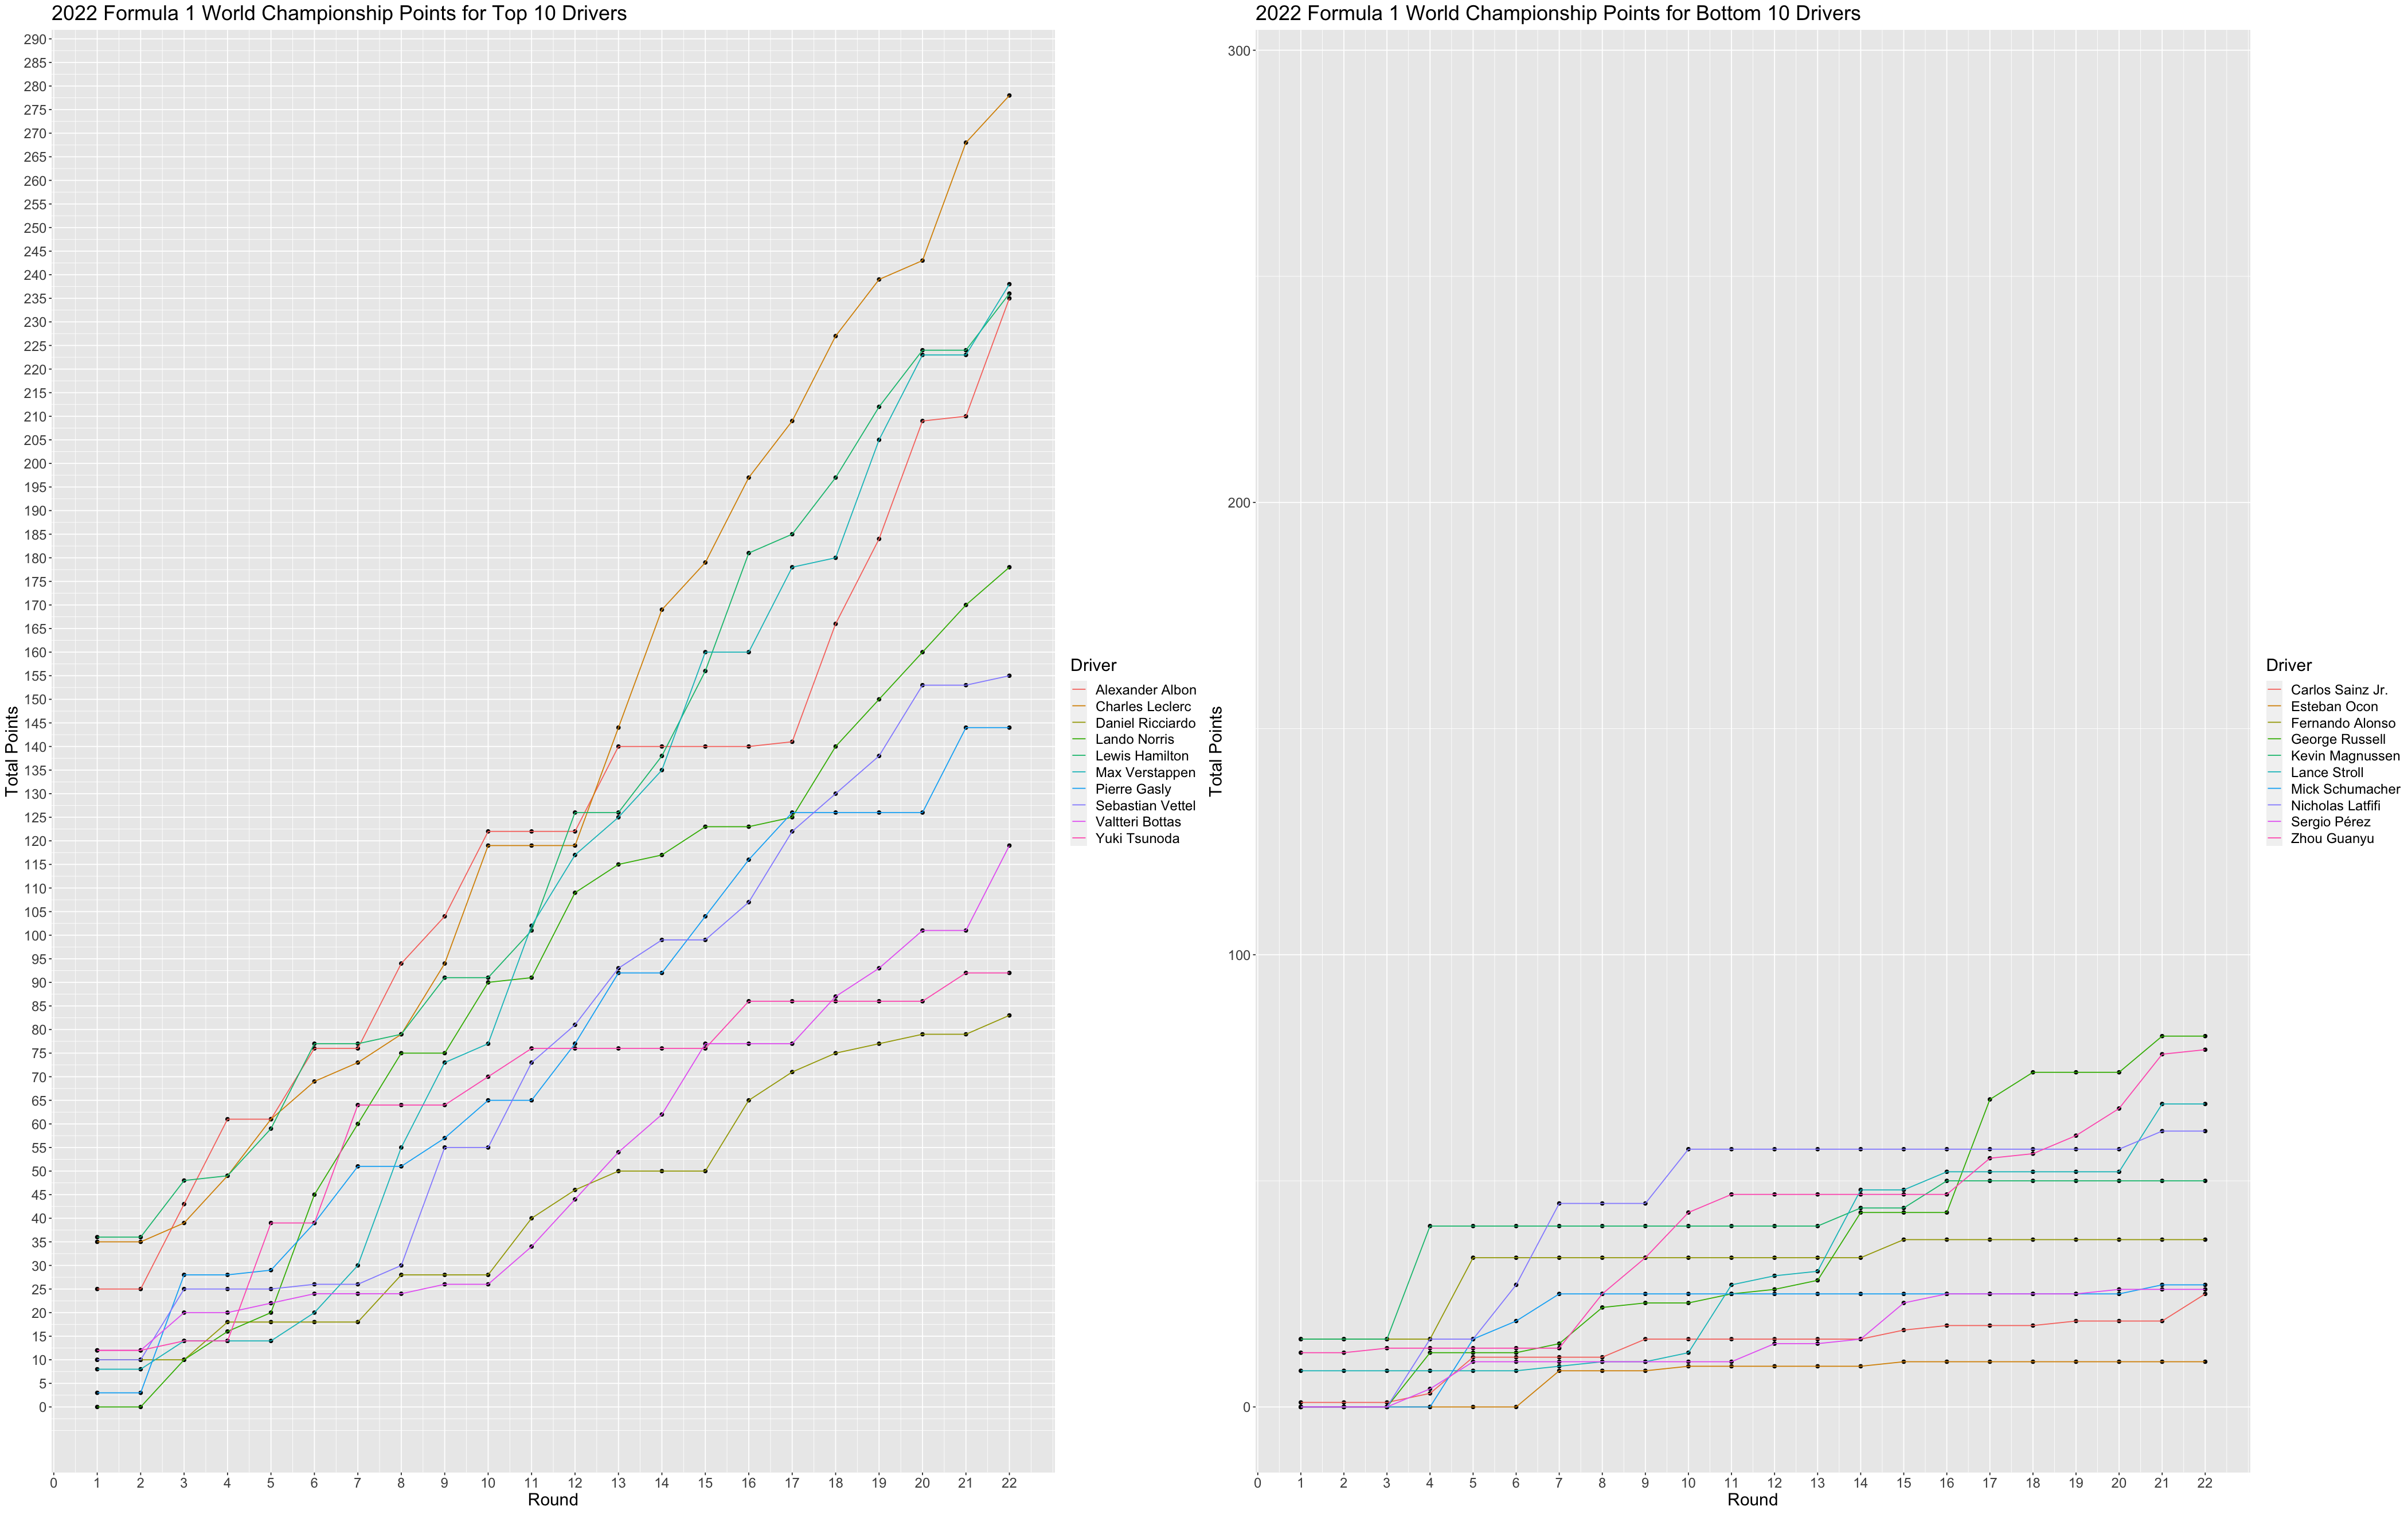

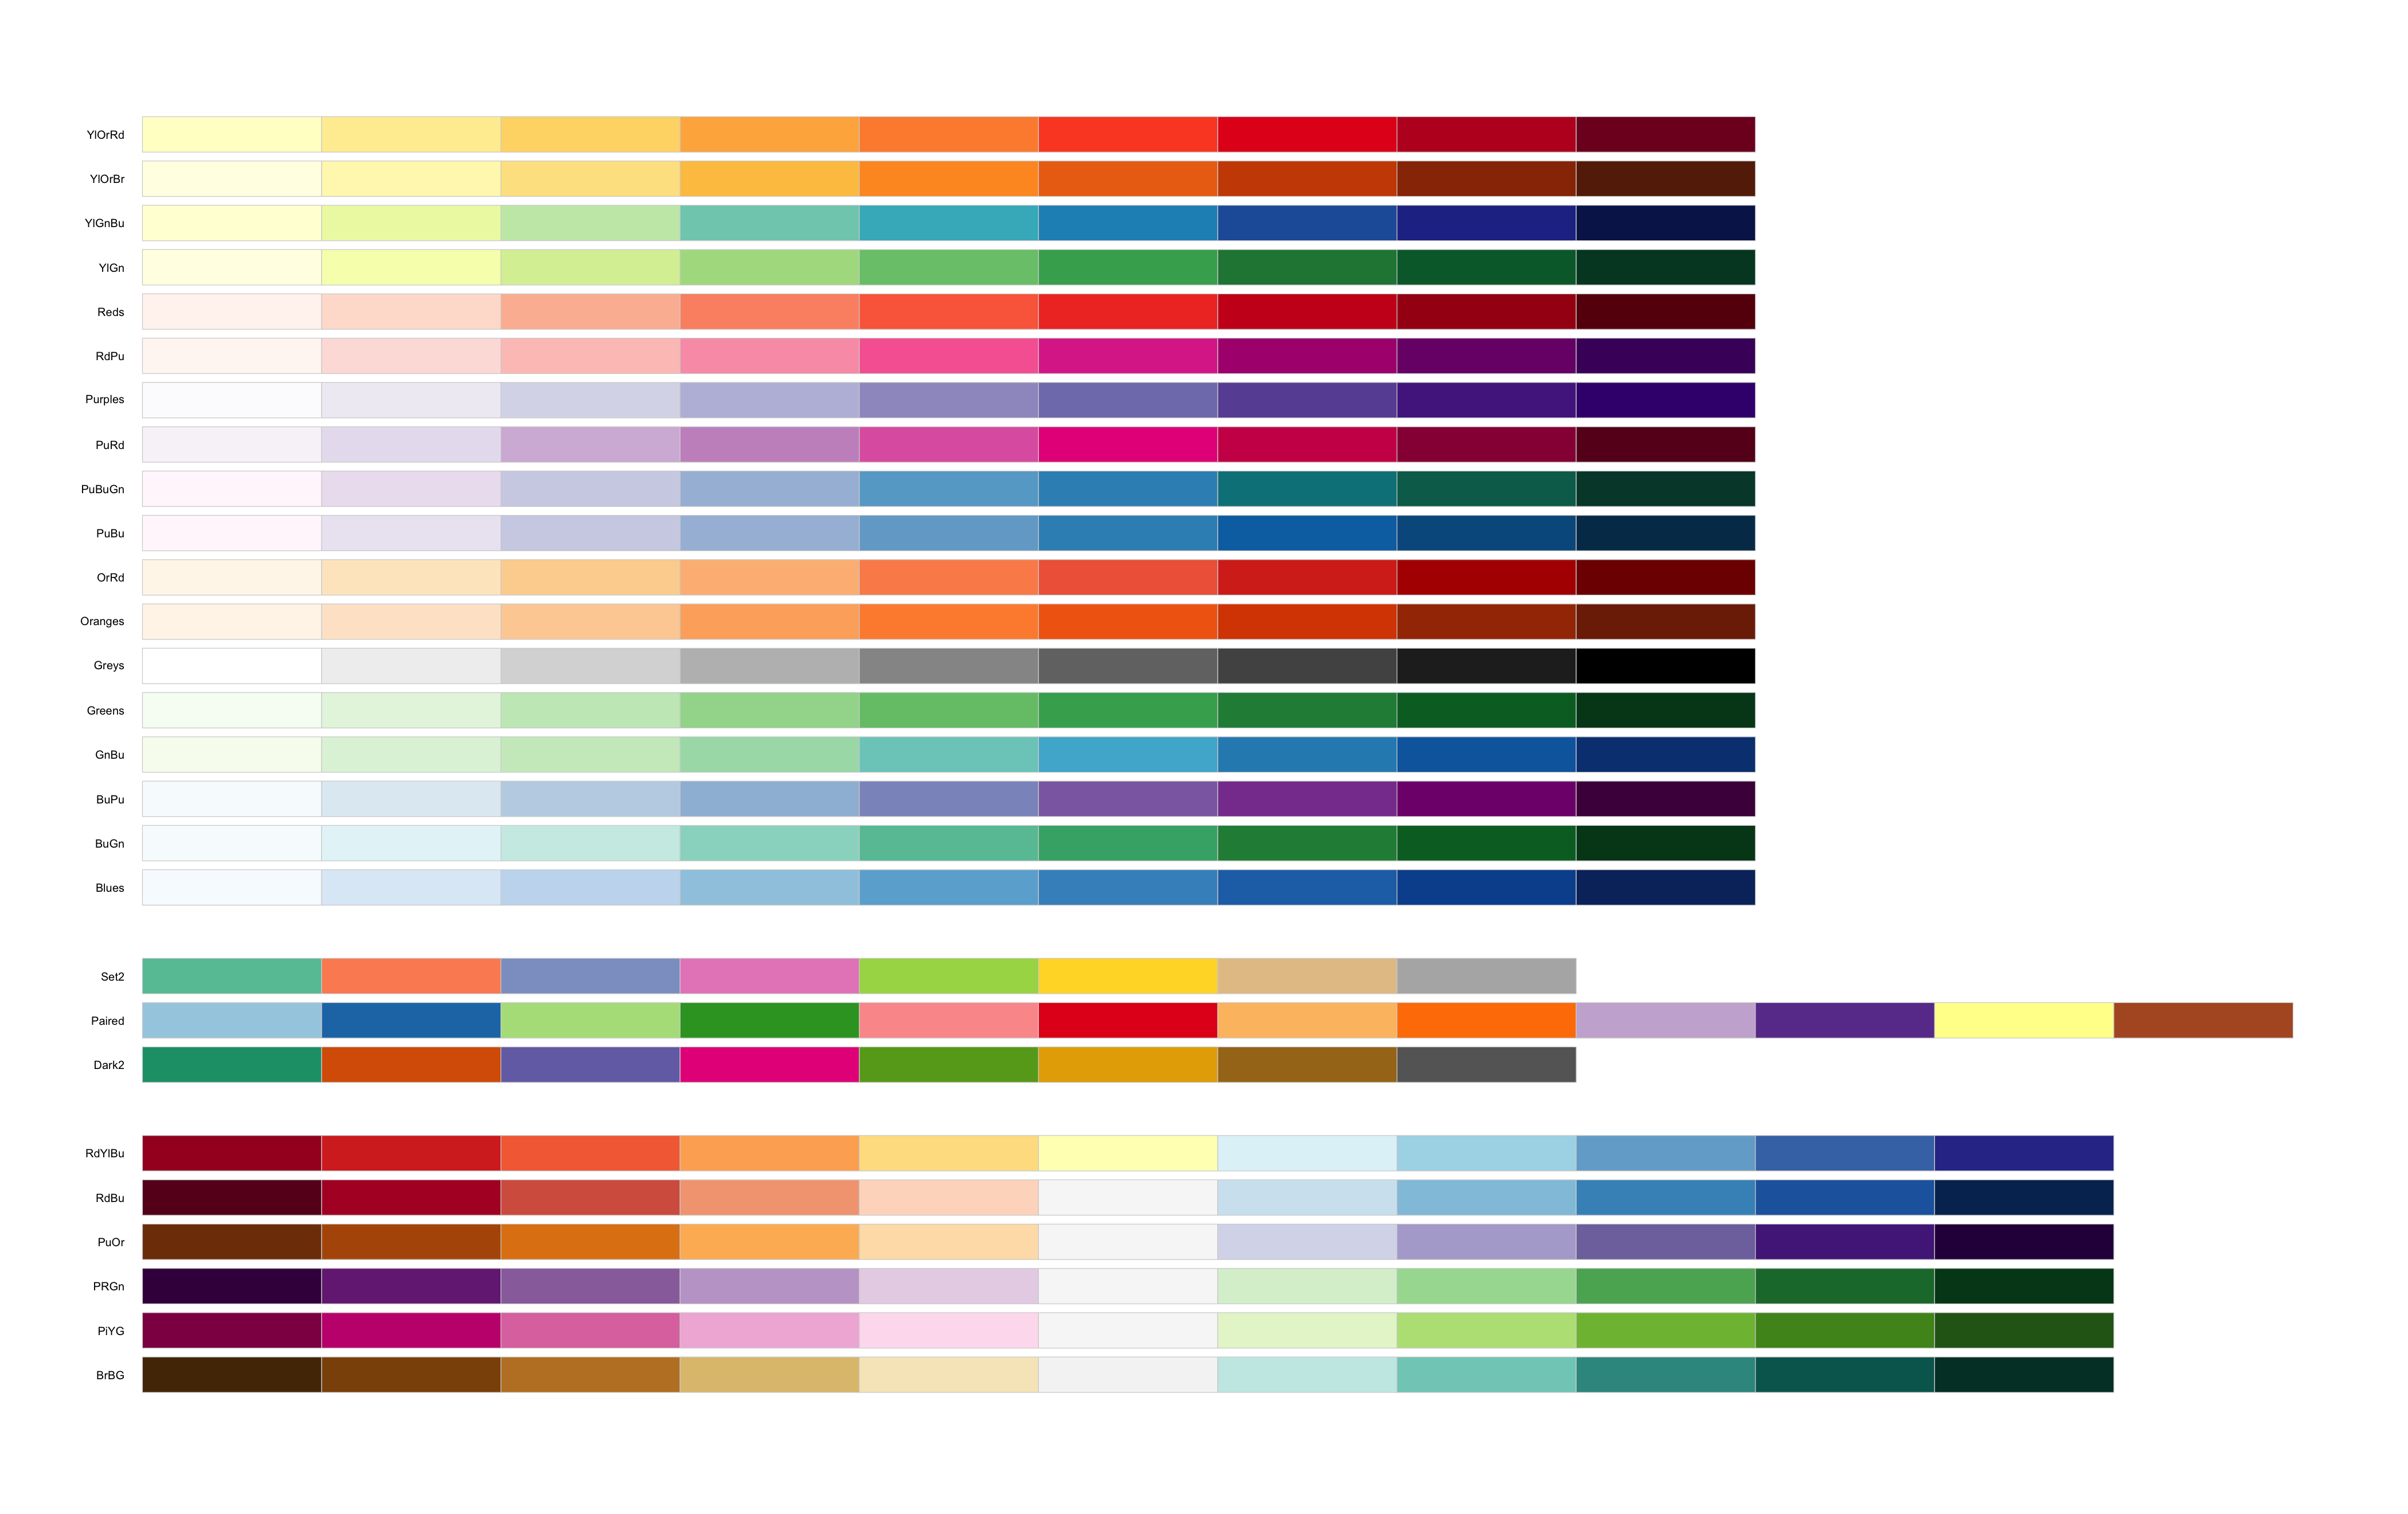

In [237]:
points_data <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/point_trend.csv")

top_10_drivers <- points_data %>% 
            filter(Round == 22) %>%
            arrange(desc(by = Points_UTR)) %>%
            slice(1:10) %>% 
            pull(Driver)

bottom_10_drivers <- points_data %>% 
            filter(Round == 22) %>%
            arrange(desc(by = Points_UTR)) %>%
            slice(11:20) %>% 
            pull(Driver)


points_top_10 <- points_data %>% filter(Driver %in% top_10_drivers)

points_bottom_10 <- points_data %>% filter(Driver %in% bottom_10_drivers)


options(repr.plot.width = 35, repr.plot.height = 22)


#### TOP 10


driver_champ_top <- ggplot(points_top_10, aes(x = Round, y = Points_UTR)) + 
                geom_point() +
                geom_line(aes(colour = Driver)) + 
                labs(x = "Round", y = "Total Points", color = "Driver") + 
                theme(text = element_text(size = 18)) +
                ggtitle("2022 Formula 1 World Championship Points for Top 10 Drivers") + 
                scale_x_continuous(breaks = seq(0, 22, 1)) +  
                scale_y_continuous(breaks = seq(0, 300, 5)) + 
                scale_fill_brewer(palette = "Paired") 


driver_champ_bottom <- ggplot(points_bottom_10, aes(x = Round, y = Points_UTR)) + 
                geom_point() +
                geom_line(aes(colour = Driver)) + 
                labs(x = "Round", y = "Total Points", color = "Driver") + 
                theme(text = element_text(size = 18)) + 
                ggtitle("2022 Formula 1 World Championship Points for Bottom 10 Drivers") + 
                scale_x_continuous(breaks = seq(0, 22, 1)) +  
                scale_y_continuous(breaks = seq(0, 300, 5)) + 
                scale_fill_brewer(palette = "Paired") + 
                ylim(0, 290)


final_standings <- plot_grid(driver_champ_top, driver_champ_bottom)

final_standings

display.brewer.all(colorblindFriendly = T)

## Constructors' World Championship

# Discussion

# References